# Hladina v nádržích

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import sympy as sp

In [2]:
%matplotlib notebook
sp.init_printing()
x, y = sp.symbols('x y')

## Řešení
### sdružená hustota pravděpodobnosti 
$$f_{XY}(x,y) = \frac{6}{5} \left( x + y^2 \right)$$

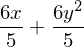

Plocha fxy = 1


In [3]:
fxy = sp.Rational(6, 5) * (x + y**2)
display(fxy)
print('Plocha fxy =', sp.integrate(sp.integrate(fxy, (x, 0, 1)), (y, 0, 1)))

### distribuční funkce

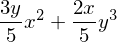

In [4]:
Fxy = sp.integrate(sp.integrate(fxy, (x, 0, x)), (y, 0, y))
display(Fxy)

### marginální hustoty pravděpodobnosti

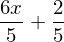

Plocha fx = 1


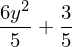

Plocha fy = 1


In [5]:
fx = sp.integrate(fxy, (y, 0, 1))
display(fx)
print('Plocha fx =', sp.integrate(fx, (x, 0, 1)))

fy = sp.integrate(fxy, (x, 0, 1))
display(fy)
print('Plocha fy =', sp.integrate(fy, (y, 0, 1)))

### nezávislost $X$ a $Y$

Jsou X a Y nezávislé? False


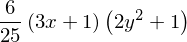

In [6]:
print('Jsou X a Y nezávislé?', fx * fy == fxy)
fxy_mult = fx * fy
display(sp.simplify(fxy_mult))

### pravděpodobnosti

In [7]:
print('P(X=0.5 | Y<0.5) =', sp.integrate(fxy.subs(dict(x=0.5)), (y, 0, .5)))
print('P(X<0.5 ^ Y<0.5) =', sp.integrate(sp.integrate(fxy, (x, 0, .5)), (y, 0, .5)))

P(X=0.5 | Y<0.5) = 0.350000000000000
P(X<0.5 ^ Y<0.5) = 0.100000000000000


## Grafické zobrazení hustot
### Zadaná sdružená hustota pravděpodobnosti

<IPython.core.display.Javascript object>


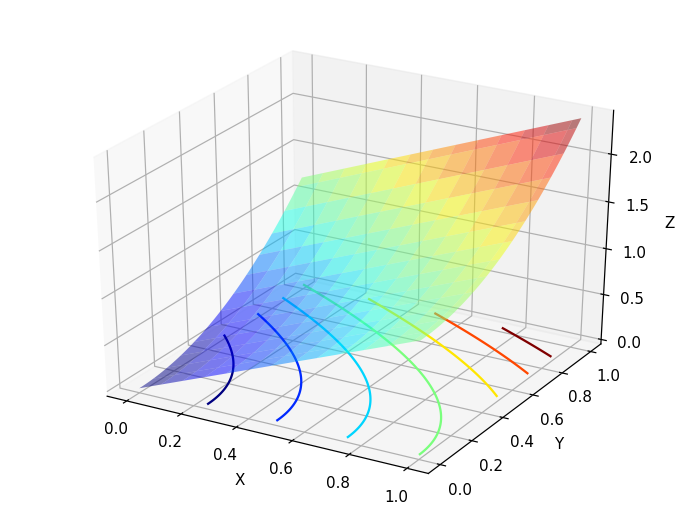

In [8]:
fig = plt.figure(tight_layout=True)
ax = fig.gca(projection='3d')

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = 6 / 5 * (X + Y**2)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, cmap=plt.get_cmap('jet'), alpha=.5)
#ax.plot_wireframe(X, Y, Z, rstride=8, cstride=8, cmap=plt.get_cmap('coolwarm'), alpha=.)

cset = ax.contour(X, Y, Z, zdir='z', offset=0, cmap=plt.get_cmap('jet'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');

### Sdružená hustota pravděpodobnosti získaná jako součin marginálních hustot původní sdružené hustoty pravděpodobnosti

<IPython.core.display.Javascript object>


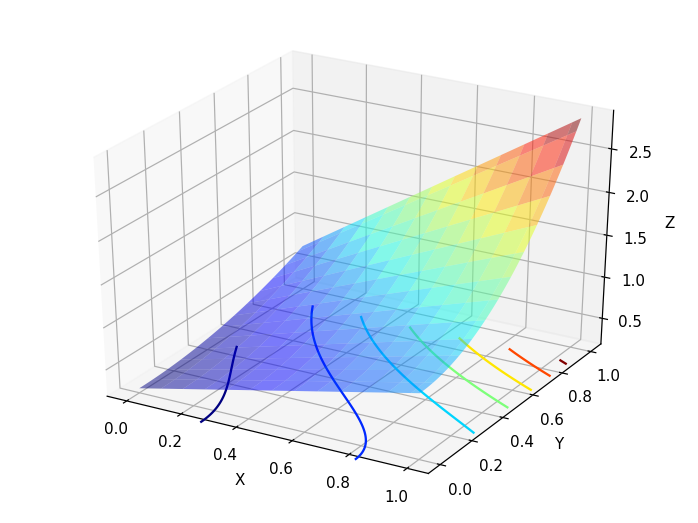

In [9]:
fig = plt.figure(tight_layout=True)
ax = fig.gca(projection='3d')

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = 6 * (3 * X + 1) * (2 * Y**2 + 1) / 25
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, cmap=plt.get_cmap('jet'), alpha=.5)

cset = ax.contour(X, Y, Z, zdir='z', offset=0, cmap=plt.get_cmap('jet'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');

### Marginální hustoty pravděpodobnosti

<IPython.core.display.Javascript object>


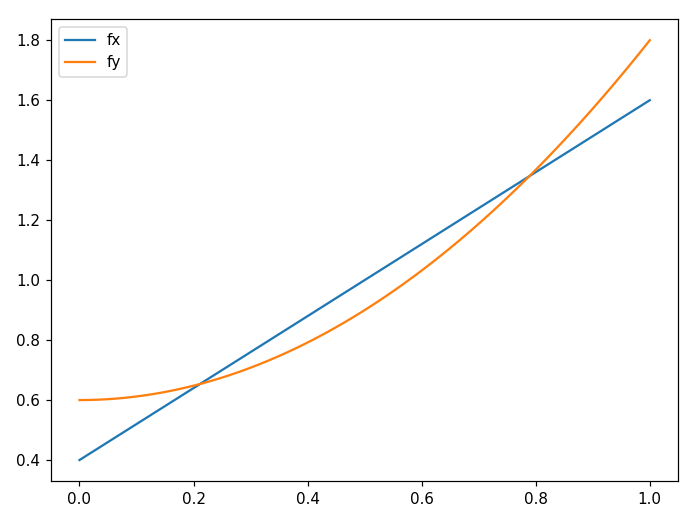

In [10]:
fig, ax = plt.subplots(tight_layout=True)
# fx
x = np.linspace(0, 1, 100)
y = 6*x/5 + 2/5
ax.plot(x, y, label='fx')

# fy
x = np.linspace(0, 1, 100)
y = 6*x**2/5 + 3/5
ax.plot(x, y, label='fy')

ax.legend();

### Distribuční funkce původní sdružené hustoty pravděpodobnosti

<IPython.core.display.Javascript object>


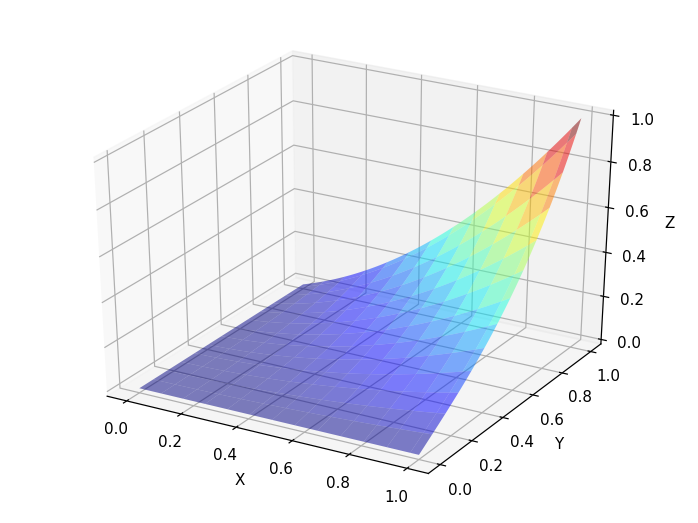

In [12]:
fig = plt.figure(tight_layout=True)
ax = fig.gca(projection='3d')

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
Z = 3*X**2*Y/5 + 2*X*Y**3/5
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, cmap=plt.get_cmap('jet'), alpha=.5)

#cset = ax.contour(X, Y, Z, 10, zdir='z', offset=1, cmap=plt.get_cmap('jet'))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');